** *Perfect Multicollinearity*   occurs when one independent
variable in a multiple regression model is an exact linear combination of one or more other independent variables.

In other words,
there is an exact linear relationship between the independent variables, making it impossible
to uniquely estimate the individual effects of each variable on the dependent variable.**

In [15]:
import numpy as np

# create mulicolinearity data
arr = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                [1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T
# inverse of arr
np.linalg.inv(np.dot(arr.T,arr))

array([[  0.67713004,   1.89686099,  -1.97309417],
       [  1.89686099,  18.3309417 , -18.40807175],
       [ -1.97309417, -18.40807175,  18.49775785]])

In [16]:
# check sensitivity of arr(which is multicolinear)
arr = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                [1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T

# inverse of arr
np.linalg.inv(np.dot(arr.T,arr))


array([[  0.579715  ,   1.55493605,  -1.62140011],
       [  1.55493605,  24.45470752, -24.42659041],
       [ -1.62140011, -24.42659041,  24.41073715]])

In [17]:
# non-mulicolinearity data
arr = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                [3.2, 0.1, 8.1, 7.1, 2.0, 1.0, 9.0, 6.0, 6.1, 3.2]]).T

# inverse of arr
np.linalg.inv(np.dot(arr.T,arr))

array([[ 0.61028818, -0.05847921, -0.04106283],
       [-0.05847921,  0.0128443 , -0.00268404],
       [-0.04106283, -0.00268404,  0.01219474]])

In [18]:
# check sensitivity of arr(which is non-multicolinear)
arr = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                [3.2, 0.1, 8.1, 7.1, 2.0, 1.0, 9.0, 6.0, 6.1, 3.2]]).T

# inverse of arr
np.linalg.inv(np.dot(arr.T,arr))

array([[ 0.61028818, -0.05847921, -0.04106283],
       [-0.05847921,  0.0128443 , -0.00268404],
       [-0.04106283, -0.00268404,  0.01219474]])

# How to detect Multicolinearity

In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv',)
df = df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: >

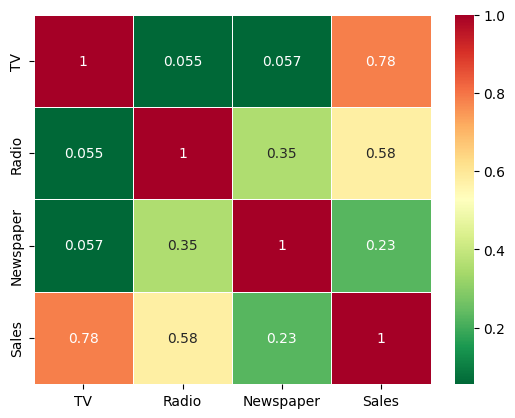

In [33]:
# Correlation
import seaborn as sns
sns.heatmap(df.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True)

# Variance inflation factor

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []
for i in range(3):
  vif.append(variance_inflation_factor(df.iloc[:,1:4], i))

pd.DataFrame({'vif':vif},index=df.columns[1:4]).T

,Radio,Newspaper,Sales
vif,5.603259,3.140226,5.928228


# Condition No.

In [40]:
A = np.array([[1, 2],
              [3, 4]])

condition_number = np.linalg.cond(arr)
print("Condition Number:", condition_number)

Condition Number: 19.630005266931274


In [45]:
# data is multicolinear
arr = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                [1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T

c = np.linalg.cond(arr)
print('data is multicolinear')
print("Condition Number:", c)

data is multicolinear
Condition Number: 196.2052955442659


In [46]:
# data is not multicolinear
arr = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                [3.2, 0.1, 8.1, 7.1, 2.0, 1.0, 9.0, 6.0, 6.1, 3.2]]).T

c = np.linalg.cond(arr)
print('data is not multicolinear')
print("Condition Number:", c)

data is not multicolinear
Condition Number: 19.630005266931274


In [39]:
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)

# Introduce multicollinearity between columns 0 and 1
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

data.corr()

,X1,X2,X3,y
X1,1.000000,0.882948,-0.048636,0.148108
X2,0.882948,1.000000,-0.054696,0.165352
X3,-0.048636,-0.054696,1.000000,0.071536
y,0.148108,0.165352,0.071536,1.000000
